<h1 style='text-align: center;'> STT 481 Final Project </h1>
<h3 style='text-align: center;'> By Aditya Pendyala </h2> 
<h3 style='text-align: center;'> March 2, 2024 </h2>

**About the dataset:**

*This dataset, Ames Housing dataset, consists of 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa. It was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset.* 

<h3 style='text-align: left;'> 1. Data Exploration and Pre-Processing </h2>

*Firstly, importing all the necessary libraries for this project.*

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.metrics import r2_score

*Importing the train.csv and test.csv data using pandas.*

In [3]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split


In [2]:
train_df = pd.read_csv("files/train.csv")
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


*Understanding the dataset by printing information like Na counts and datatypes for each column.*

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

*Dropping columns that have a considerable number of Na(s) and printing the shape of the resulting dataframe*

In [4]:
train_df_col_drop = train_df.drop(columns = ['Id', 'Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature'])
print(train_df_col_drop.shape)

(1460, 74)


*Now replacing Na values with values right above Na value row using ffill method. Sorting each column in ascending order before filling to fill Na(s) with closest possible values.* 

In [5]:
filled_train_df = train_df_col_drop.apply(lambda x: x.sort_values().fillna(method='bfill'))

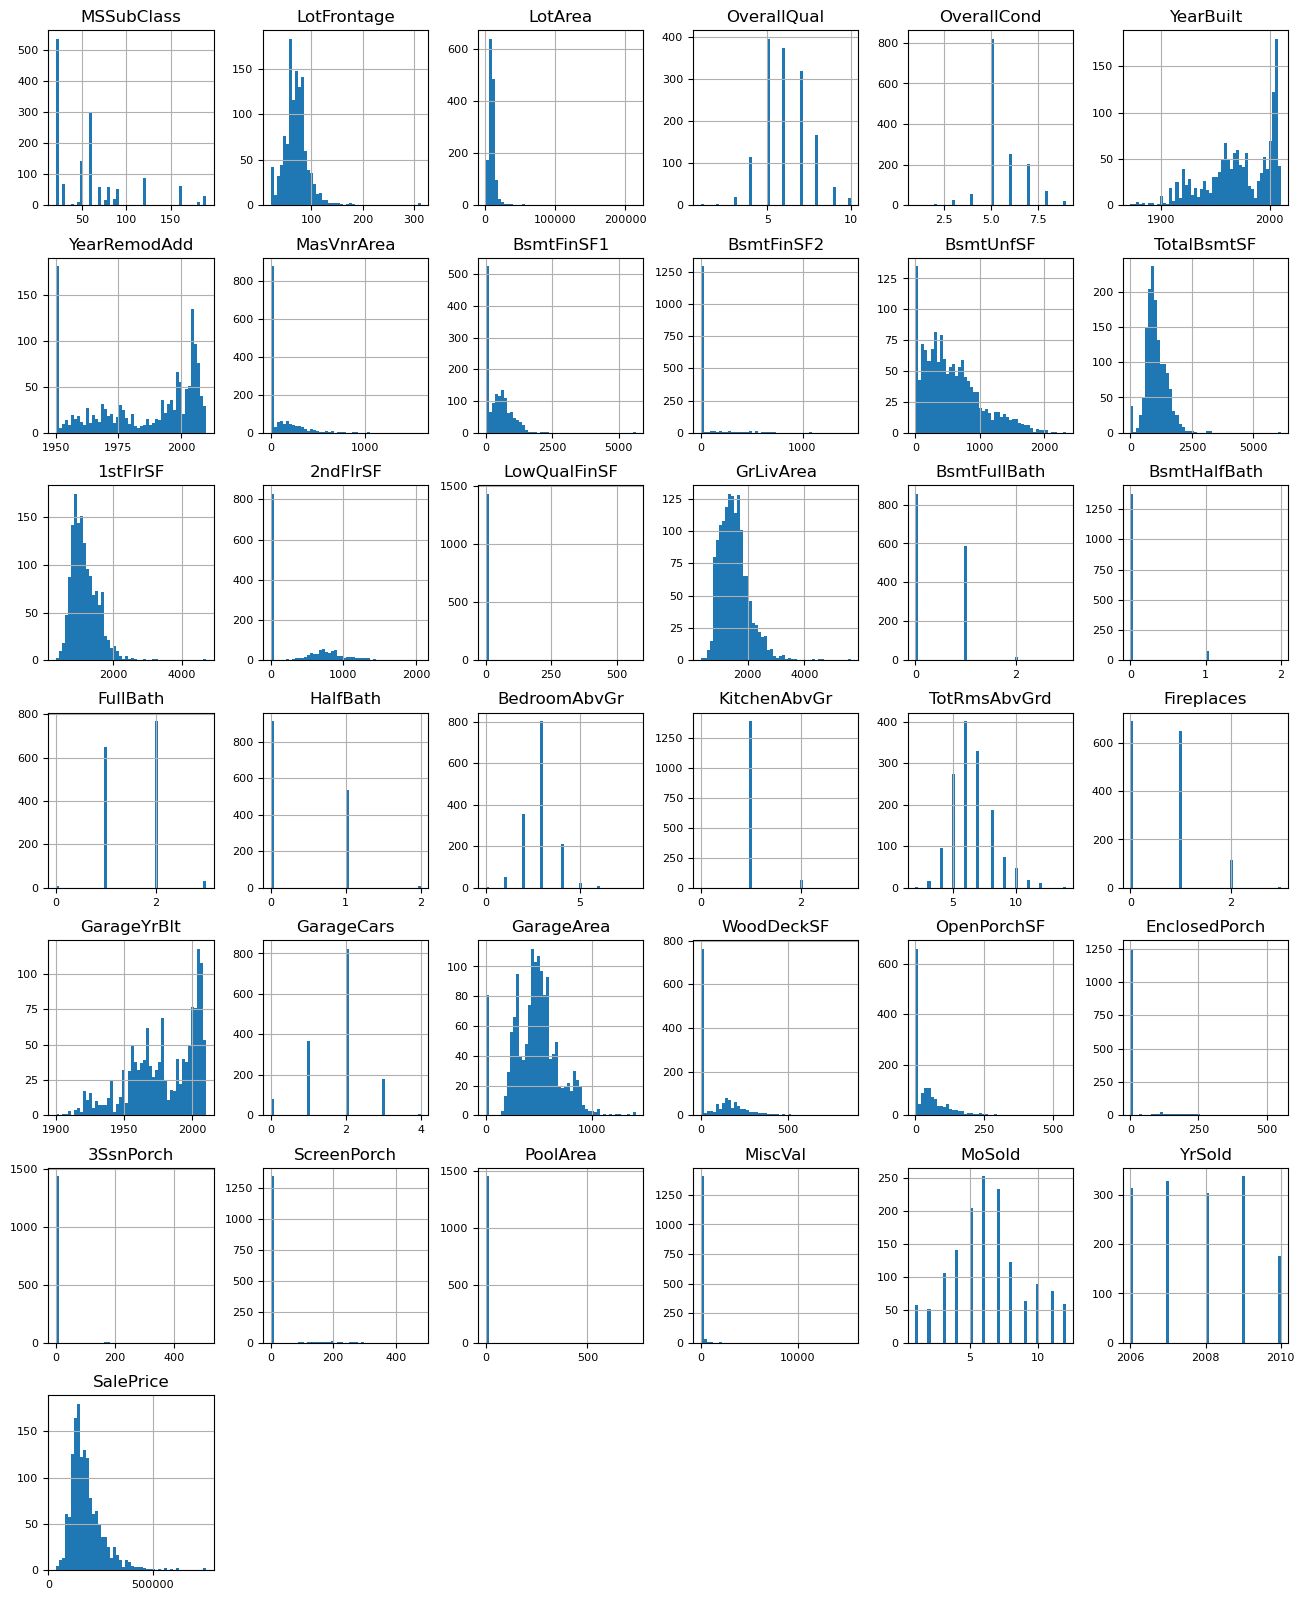

In [6]:
train_df_numeric = filled_train_df.select_dtypes(include = ['float64', 'int64'])
train_df_numeric.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

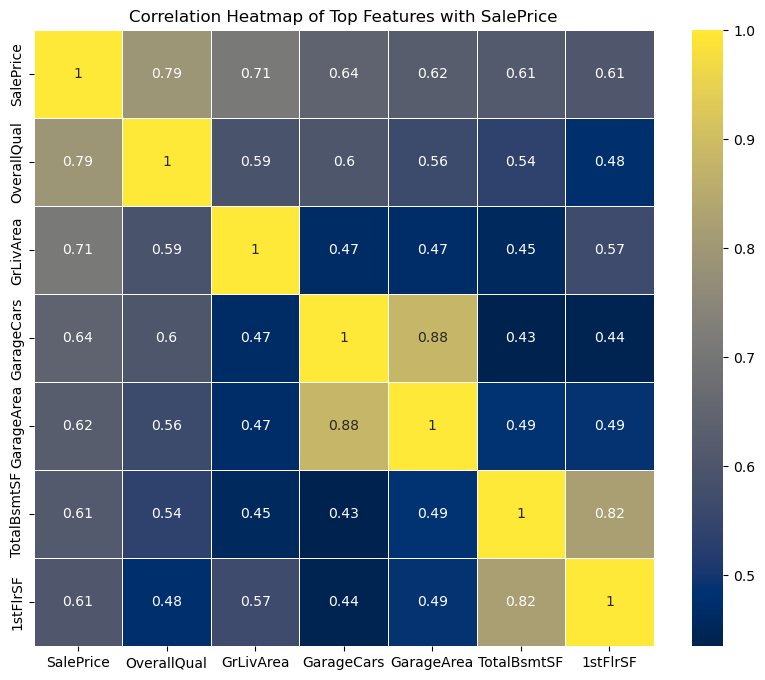

In [7]:
# Encoding string columns
train_encoded = pd.get_dummies(filled_train_df)

# Calculating the correlation matrix
corr_matrix = train_encoded.corr()
saleprice_corr = corr_matrix['SalePrice'].sort_values(ascending=False)

# Plotting the top correlated features (correlation greater than 0.6)
top_corr_features = saleprice_corr[abs(saleprice_corr) > 0.60]  
plt.figure(figsize=(10, 8))

#Choosing cividis color scheme for maximum accessibility and creating a heatmap
sns.heatmap(train_encoded[top_corr_features.index].corr(), annot=True, cmap='cividis', linewidths=0.5)
plt.title('Correlation Heatmap of Top Features with SalePrice')
plt.show()

<h3 style='text-align: left;'> 3. Fitting the Model </h2>

In [9]:
# Predicting on the testing data
y_pred = xgb_reg.predict(X_test)

# Calculating the R-squared score
r_squared = r2_score(y_test, y_pred)
print("R-squared score:", r_squared)


R-squared score: 0.9030804045102186


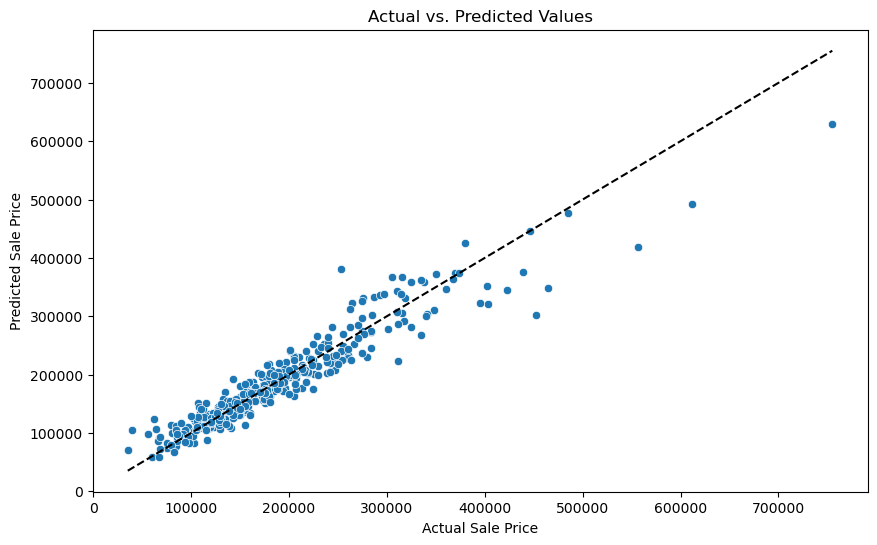

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')  # Line representing perfect predictions
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.show()


<h3 style='text-align: left;'> 4. Pre-processing testing data </h2>

In [11]:
test_df = pd.read_csv('files/test.csv')
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [12]:
filled_test_df = test_df.apply(lambda x: x.sort_values().fillna(method='ffill'))

# Encode categorical variables
test_encoded = pd.get_dummies(filled_test_df)

# Check for any columns in X_train that are not in test_encoded and add them with 0 values
missing_cols = set(X_train.columns) - set(test_encoded.columns)
for c in missing_cols:
    test_encoded[c] = 0

# Ensure the order of columns in test matches that of X_train
test_encoded = test_encoded[X_train.columns]

# Display the first few rows of the processed test set to confirm preparation
test_encoded.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,False,False,False,True,False,False,False,False,True,False
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,False,False,False,True,False,False,False,False,True,False
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,False,False,False,True,False,False,False,False,True,False
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,False,False,False,True,False,False,False,False,True,False
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,False,False,False,True,False,False,False,False,True,False


In [13]:
predicted_test_values = xgb_reg.predict(test_encoded)

In [14]:
# Creating a DataFrame with IDs from the test set and the corresponding predicted SalePrice
output_df = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': predicted_test_values
})

# Saving this DataFrame to a CSV file
output_csv_path = 'files/predicted_sale_prices.csv'
output_df.to_csv(output_csv_path, index=False)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.metrics import r2_score
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('files/train.csv')
df = df.drop(columns = ['Id', 'Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature'])
df = df.apply(lambda x: x.sort_values().fillna(method='bfill'))
df = pd.get_dummies(df)

In [3]:
X = df.drop(['SalePrice'], axis=1).values  
y = df['SalePrice'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [4]:
# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
X_train_tensor = torch.from_numpy(X_train_scaled.astype('float32'))
y_train_tensor = torch.from_numpy(y_train.astype('float32')).view(-1, 1)
X_test_tensor = torch.from_numpy(X_test_scaled.astype('float32'))
y_test_tensor = torch.from_numpy(y_test.astype('float32')).view(-1, 1)


In [6]:

# Create TensorDatasets and DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [7]:
import torch.nn as nn

class MNN(nn.Module):
    def __init__(self, input_size):
        super(MNN, self).__init__()
        self.layer1 = nn.Linear(input_size, 128)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(128, 64)
        self.output = nn.Linear(64, 1)
    
    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.output(x)
        return x

model = MNN(input_size=X_train.shape[1])


In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Training loop
model.train()
for epoch in range(20):  # number of epochs
    for batch_idx, (data, targets) in enumerate(train_loader):
        # Forward pass
        predictions = model(data)
        loss = criterion(predictions, targets)
        
        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')


In [ ]:
model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # Inference mode, gradients not computed
    test_predictions = model(X_test_tensor)
    test_loss = criterion(test_predictions, y_test_tensor)
    print(f'Test Loss: {test_loss.item()}')

# Convert predictions to a numpy array if needed
test_predictions_np = test_predictions.numpy()
